Before we get into the project, what is a future?

A future is a financial asset that trading companies can buy and sell and use to generate revenue.

Two types: version where a buyer must buy at a certain price at a specified time
or where a seller must sell at a certain price at a specificed time.

These contracts are purchased at a given price, which is what will be analyzed in this project.

Why purchase futures? 
If the price is high at the time of the contract agreement date, the person that holds the future will make (Revenue - future price).
For the other version, if the price is low at the time of buying, then it is very profitable to purchase the commodity at that price.

Future are mainly used for trading commodities, such as oil, gold, soybeans, etc. However they can be also used for stocks and other financial securities,
such as AAPL stock. Maybe purchasing lots of these stocks can prove useful in the long run and generate lots of revenue!

As for Gold and Crude Oil future prices, we begin by importing all nessacary files and reading the Excel file. Then, convert all time-values to numerical values to compare to each other, and merge them together into one list, and return the lists as two columns. This helps us visualize the data later.

In [100]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Preprocessing steps: selecting relevant columns, converting Time to datetime, and merging

# Extract relevant columns: 'Time' and 'Last'
oil_df = oil_df[['Time', 'Last']].rename(columns={'Last': 'Oil_Last_Price'})
gold_df = gold_df[['Time', 'Last']].rename(columns={'Last': 'Gold_Last_Price'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both prices are available
merged_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Print out all matching dates and values for oil and gold prices
print(merged_df[['Time', 'Oil_Last_Price', 'Gold_Last_Price']].to_string(index=False))



      Time  Oil_Last_Price  Gold_Last_Price
2024-10-17           70.07           2691.1
2024-10-16           69.82           2691.3
2024-10-15           70.01           2678.9
2024-10-14           73.24           2665.6
2024-10-11           74.85           2676.3
2024-10-10           75.11           2639.3
2024-10-09           72.59           2626.0
2024-10-08           72.98           2635.4
2024-10-07           76.47           2666.0
2024-10-04           73.68           2667.8
2024-10-03           73.17           2679.2
2024-10-02           69.69           2669.7
2024-10-01           69.39           2690.3
2024-09-30           67.77           2659.4
2024-09-27           67.67           2668.1
2024-09-26           67.19           2694.9
2024-09-25           69.13           2684.7
2024-09-24           70.84           2677.0
2024-09-23           69.61           2652.5
2024-09-20           70.10           2646.2
2024-09-19           70.26           2614.6
2024-09-18           69.08      

Below, we want to take a look at what the data looks like, so we scale the two prices to values between 0 and 1, where 0 represents the lowest point in the dataset, and 1 being the highest point. This is helpful since it allows us to see the data in a more simpler way, and rather than two far apart values. This is commonly used in machine learning algorithms to standarize data in order to be trained. Below are the two plotted against each other.

In [101]:
# Normalize the prices by scaling them
merged_df['Scaled_Oil_Price'] = (merged_df['Oil_Last_Price'] - merged_df['Oil_Last_Price'].min()) / (merged_df['Oil_Last_Price'].max() - merged_df['Oil_Last_Price'].min())
merged_df['Scaled_Gold_Price'] = (merged_df['Gold_Last_Price'] - merged_df['Gold_Last_Price'].min()) / (merged_df['Gold_Last_Price'].max() - merged_df['Gold_Last_Price'].min())

# Plot the data using Plotly Express
fig = px.line(merged_df, x='Time', y=['Scaled_Oil_Price', 'Scaled_Gold_Price'], labels={
    'Time': 'Date',
    'value': 'Scaled Price',
    'variable': 'Futures Price'
})

# Update the layout to enhance the graph's visibility
fig.update_layout(
    title="Oil and Gold Futures Prices Over Time (Scaled)",
    xaxis_title="Date",
    yaxis_title="Scaled Price",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()


Now the data above does not look that meaningful. So, lets take a look at the volumes of traded amount, which is also included in the dataset. Maybe the amount traded can tell us more about what is underlying in the market and when to purchase these future prices.

In [102]:

correlation_score = merged_df[['Scaled_Oil_Price', 'Scaled_Gold_Price']].corr().iloc[0, 1]

print(f"Correlation Score between Scaled Oil and Scaled Gold Prices: {correlation_score}")

Correlation Score between Scaled Oil and Scaled Gold Prices: -0.06744217961787997


Lol looks like they are not very correlated. A score of -1 is negative correlation, 0 is no correlation, and 1 is perfect correlation. Anything less than absolute value of 0.5 is not very significant. Unlucky. Lets try another statistic, maybe it can provide us some more insight in predicting. 

In [103]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and 'Volume' (which is in Column H)
oil_df = oil_df[['Time', 'Volume']].rename(columns={'Volume': 'Oil_Volume'})
gold_df = gold_df[['Time', 'Volume']].rename(columns={'Volume': 'Gold_Volume'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both volumes are available
merged_vol_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Save the merged dataset to a new CSV file (optional)
merged_vol_df.to_csv('Merged_Oil_Gold_Volume.csv', index=False)

# Print the merged dataset in a readable format
print(merged_vol_df.to_string(index=False))


      Time  Oil_Volume  Gold_Volume
2024-10-17        7089        16638
2024-10-16      163532       151576
2024-10-15      244857       160564
2024-10-14      174465       123361
2024-10-11      217337       168597
2024-10-10      206392       195581
2024-10-09      228018       143000
2024-10-08      329532       233849
2024-10-07      257209       130705
2024-10-04      262039       192656
2024-10-03      275077       138551
2024-10-02      241143       128680
2024-10-01      353033       202756
2024-09-30      189292       173252
2024-09-27      169902       196732
2024-09-26      274694       217643
2024-09-25      272174       189943
2024-09-24      167023       216553
2024-09-23      185350       170494
2024-09-20      194524       207209
2024-09-19      199086       204475
2024-09-18      195556       233128
2024-09-17      168970       159525
2024-09-16      135774       127576
2024-09-13      155136       174674
2024-09-12      154054       233679
2024-09-11      199561      

Here we have the volume of futures purchased at each given date. However it is difficult to read, so once again standarize the data to between 0 and 1, and plot to see if there are any visual correlations.

In [104]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and 'Volume' (which is in Column H)
oil_df = oil_df[['Time', 'Volume']].rename(columns={'Volume': 'Oil_Volume'})
gold_df = gold_df[['Time', 'Volume']].rename(columns={'Volume': 'Gold_Volume'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both volumes are available
merged_vol_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Normalize the volumes by scaling them
merged_vol_df['Scaled_Oil_Volume'] = (merged_vol_df['Oil_Volume'] - merged_vol_df['Oil_Volume'].min()) / (merged_vol_df['Oil_Volume'].max() - merged_vol_df['Oil_Volume'].min())
merged_vol_df['Scaled_Gold_Volume'] = (merged_vol_df['Gold_Volume'] - merged_vol_df['Gold_Volume'].min()) / (merged_vol_df['Gold_Volume'].max() - merged_vol_df['Gold_Volume'].min())

# Plot the data using Plotly Express
fig = px.line(merged_vol_df, x='Time', y=['Scaled_Oil_Volume', 'Scaled_Gold_Volume'], labels={
    'Time': 'Date',
    'value': 'Scaled Volume',
    'variable': 'Futures Volume'
})

# Update the layout for better readability
fig.update_layout(
    title="Oil and Gold Futures Volumes Over Time (Scaled)",
    xaxis_title="Date",
    yaxis_title="Scaled Volume",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()


Okay, once again kinda at a loss here visually. Lets see what the correlation test gives us.

In [105]:
correlation = merged_vol_df[['Scaled_Oil_Volume', 'Scaled_Gold_Volume']].corr()

print(f"Correlation between scaled oil and gold volumes:\n{correlation}")


Correlation between scaled oil and gold volumes:
                    Scaled_Oil_Volume  Scaled_Gold_Volume
Scaled_Oil_Volume            1.000000            0.803506
Scaled_Gold_Volume           0.803506            1.000000


This tells us there is is very little correlation between the two since the scores are very close to 0, meaning there is little to no correlation.

Finally, lets take a look at the change in price from the previous day, denoted as a percent change where it is positive if the price increased since the previous day, and negative if it decreased from the previous day.

In [106]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and '%Chg' (which is in Column G)
oil_df = oil_df[['Time', '%Chg']].rename(columns={'%Chg': 'Oil_Percent_Change'})
gold_df = gold_df[['Time', '%Chg']].rename(columns={'%Chg': 'Gold_Percent_Change'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both percent changes are available
merged_pct_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Display the table of datapoints (oil and gold percent changes)
print(merged_pct_df[['Time', 'Oil_Percent_Change', 'Gold_Percent_Change']].to_string(index=False))

# Plot the percent changes for both oil and gold
fig = px.line(merged_pct_df, x='Time', y=['Oil_Percent_Change', 'Gold_Percent_Change'], labels={
    'Time': 'Date',
    'value': 'Percent Change',
    'variable': 'Futures Percent Change'
})

# Update the layout for better readability
fig.update_layout(
    title="Oil and Gold Futures Daily Percent Changes Over Time",
    xaxis_title="Date",
    yaxis_title="Percent Change",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()


      Time  Oil_Percent_Change  Gold_Percent_Change
2024-10-17              0.0036              -0.0001
2024-10-16             -0.0027               0.0046
2024-10-15             -0.0441               0.0050
2024-10-14             -0.0215              -0.0040
2024-10-11             -0.0035               0.0140
2024-10-10              0.0347               0.0051
2024-10-09             -0.0053              -0.0036
2024-10-08             -0.0456              -0.0115
2024-10-07              0.0379              -0.0007
2024-10-04              0.0070              -0.0043
2024-10-03              0.0499               0.0036
2024-10-02              0.0043              -0.0077
2024-10-01              0.0239               0.0116
2024-09-30              0.0015              -0.0033
2024-09-27              0.0071              -0.0099
2024-09-26             -0.0281               0.0038
2024-09-25             -0.0241               0.0029
2024-09-24              0.0177               0.0092
2024-09-23  

In [107]:
correlation_matrix_pct_change = merged_pct_df[['Oil_Percent_Change', 'Gold_Percent_Change']].corr()

print(f"Correlation matrix for percent changes:\n{correlation_matrix_pct_change}")


Correlation matrix for percent changes:
                     Oil_Percent_Change  Gold_Percent_Change
Oil_Percent_Change             1.000000             0.164163
Gold_Percent_Change            0.164163             1.000000


There is a bit more correlation in these changes, however it is still not enough to be significant. In order to combat this, lets build a model that can possibly use the correlated data to predict future future gold and crude oil prices. lol.

If simply correlation does not prove significant results we can fit a model to, we can build a machine learning model that sort of takes these datapoints and builds a predictor that can use the current amount of datapoints to predict the following datapoints.

In [108]:
# Assuming merged_pct_df, merged_vol_df, and merged_df already exist from previous steps

# First, merge merged_pct_df with merged_vol_df on 'Time'
merged_pct_vol_df = pd.merge(merged_pct_df, merged_vol_df, on='Time', how='inner')

# Then, merge the result with merged_df on 'Time'
final_merged_df = pd.merge(merged_pct_vol_df, merged_df, on='Time', how='inner')

# Check the columns of the final merged dataset to confirm
print(final_merged_df)


          Time  Oil_Percent_Change  Gold_Percent_Change  Oil_Volume  \
0   2024-10-17              0.0036              -0.0001        7089   
1   2024-10-16             -0.0027               0.0046      163532   
2   2024-10-15             -0.0441               0.0050      244857   
3   2024-10-14             -0.0215              -0.0040      174465   
4   2024-10-11             -0.0035               0.0140      217337   
..         ...                 ...                  ...         ...   
196 2024-01-08             -0.0310              -0.0077       38813   
197 2024-01-05              0.0140               0.0000       27910   
198 2024-01-04             -0.0098               0.0035       42714   
199 2024-01-03              0.0262              -0.0142       49148   
200 2024-01-02             -0.0115               0.0008       33879   

     Gold_Volume  Scaled_Oil_Volume  Scaled_Gold_Volume  Oil_Last_Price  \
0          16638           0.000000            0.046635           70.07 

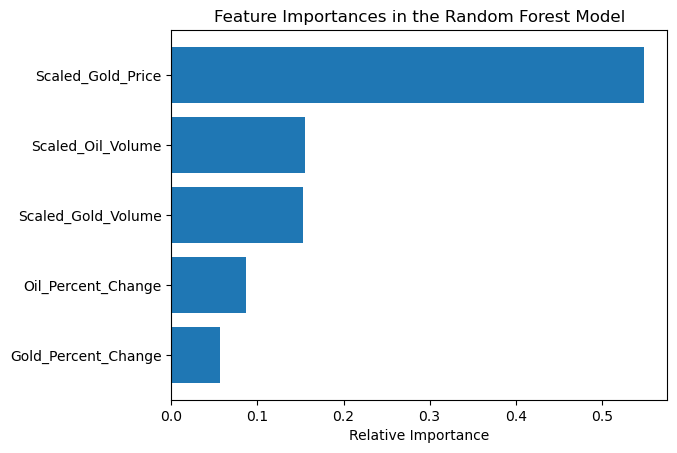

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


# Assuming the merged_df is already prepared and merged with price, volume, and percent changes
# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Gold_Price', 'Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Scaled_Oil_Price'  # Predicting oil price

# Standardizing the features for better model performance
final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Define the random forest model
rf_model = RandomForestRegressor(random_state=0)

# Fit the random forest model
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Sort the features' indices by their importance scores
indices = np.argsort(importances)

# Plot the feature importances as a horizontal bar graph
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

# Show the plot
plt.show()


It is really peculiar in that every single feature here is significant, with each being above 0.05, showing that they are relative to the predicting power of the Random Forest Model. In that case, we use all of them to train the model using the 80% training set and 20% testing set method.

In [110]:
# Necessary imports
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor


# Assuming final_merged_df is already prepared and merged with price, volume, and percent changes
# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Scaled_Oil_Price'  

final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

base_model = DecisionTreeRegressor(random_state=0)
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=0)

bagging_model.fit(X_train, y_train)

y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

train_error = np.mean((y_train_pred - y_train)**2)
test_error = np.mean((y_test_pred - y_test)**2)

print('Bagging Regressor Training Error (MSE) = %.3f' % train_error)
print('Bagging Regressor Testing Error (MSE) = %.3f' % test_error)

train_accuracy = bagging_model.score(X_train, y_train)
test_accuracy = bagging_model.score(X_test, y_test)

print('Bagging Regressor Training Accuracy (R^2) = %.3f' % train_accuracy)
print('Bagging Regressor Testing Accuracy (R^2) = %.3f' % test_accuracy)

Bagging Regressor Training Error (MSE) = 0.003
Bagging Regressor Testing Error (MSE) = 0.020
Bagging Regressor Training Accuracy (R^2) = 0.930
Bagging Regressor Testing Accuracy (R^2) = 0.465


Confusion Matrix:
 [[10  8]
 [18  5]]
AUC Score = 0.470


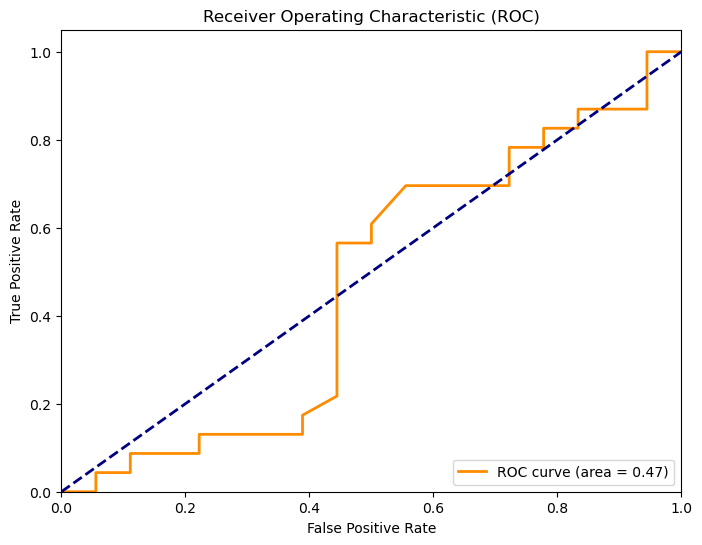

In [113]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Redefine the target variable for classification (0 = decrease, 1 = increase)
final_merged_df['Price_Change'] = np.where(final_merged_df[LABEL] > final_merged_df[LABEL].median(), 1, 0)

# Define the new LABEL for classification
LABEL = 'Price_Change'  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Define the base model and bagging classifier
base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=0)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', conf_matrix)

# AUC Score and ROC Curve
y_test_proba = bagging_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_test_proba)
print('AUC Score = %.3f' % auc_score)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Despite the Training Error and Testing Error being really low, somehow the testing accuracy is really low. A negative score means that the model does worse than just using the mean value from the regression model. Possibly our fitting is somehow how overfitting and is affected by low predicting power or overfitting/underfitting. However, the most reasonable argument based on previous tests is the data is not correlated well, meaning there is very little similarity between the crude oil future prices and gold future prices. 

Let's try another model to see if there are better results.

SVM (RBF Kernel) Training Error (MSE) = 0.016
SVM (RBF Kernel) Testing Error (MSE) = 0.024
SVM (RBF Kernel) Training Accuracy (R^2) = 0.677
SVM (RBF Kernel) Testing Accuracy (R^2) = 0.366


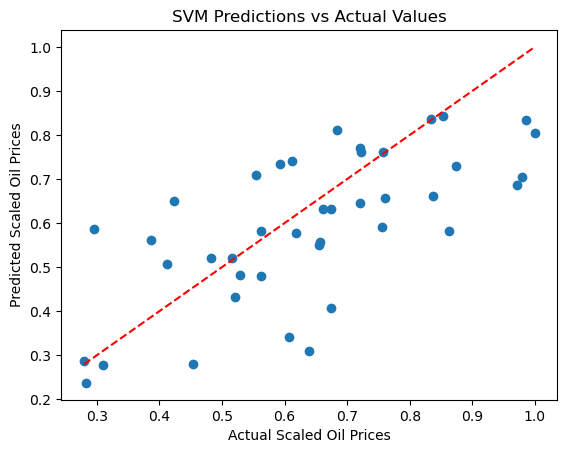

In [111]:
from sklearn import svm

# Assuming final_merged_df is already prepared with the merged dataset containing prices, volumes, and percent changes

# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Scaled_Oil_Price'  # Predicting the scaled oil price

# Standardizing the features for better model performance
final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Build SVM model and choose the Radial Basis Function (RBF) kernel function
svm_rbf = svm.SVR(kernel='rbf', C=1.0, gamma='scale')  # You can adjust C and gamma based on your needs
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Calculate training and testing errors (Mean Squared Error)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('SVM (RBF Kernel) Training Error (MSE) = %.3f' % train_error)
print('SVM (RBF Kernel) Testing Error (MSE) = %.3f' % test_error)

# Calculate R² (accuracy) scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print('SVM (RBF Kernel) Training Accuracy (R^2) = %.3f' % train_accuracy)
print('SVM (RBF Kernel) Testing Accuracy (R^2) = %.3f' % test_accuracy)

# Optional: Plotting predicted vs actual values for test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Scaled Oil Prices')
plt.ylabel('Predicted Scaled Oil Prices')
plt.title('SVM Predictions vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
plt.show()


As we can see, the model does not fit the actual values from the testing set very well. This means there are definitely some caviats between the two future prices. However, to be fair being able to predict a concrete value from simply just other features is sort of difficult, since the graphs of oil and gold at the top do seem pretty random. 

Lets give one last try by changing the problem into a classification problem, where we use the features to predict instead of a concrete number, we test to see if the oil price will increase or decrease next.

AUC Score: 0.457
Confusion Matrix:
[[18  0]
 [23  0]]


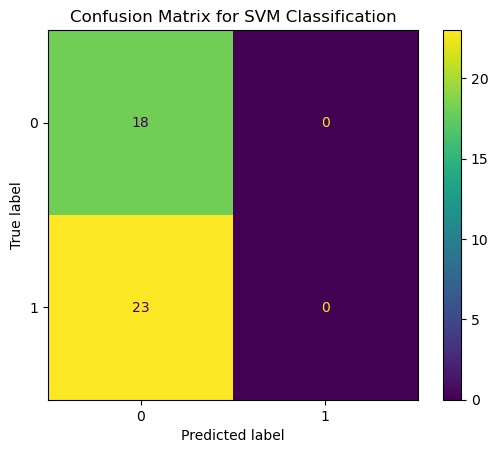

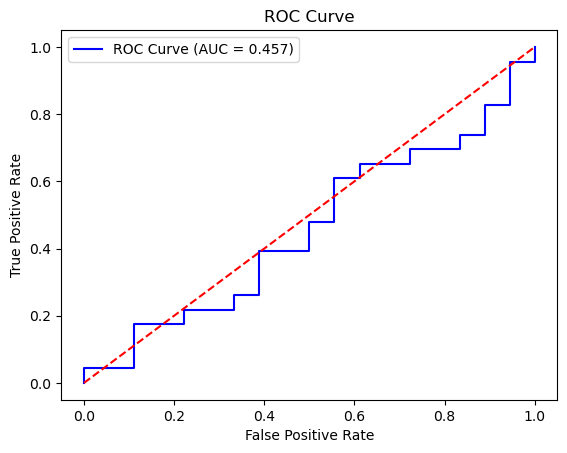

In [112]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve


# Assuming final_merged_df is already prepared with merged data

# Create a new target column: Oil_Price_Direction (1 for increase, 0 for decrease)
final_merged_df['Oil_Price_Direction'] = np.where(final_merged_df['Oil_Last_Price'].diff().fillna(0) > 0, 1, 0)

# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Oil_Price_Direction'  # We are now predicting the direction of the oil price

# Standardizing the features
final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Train an SVM model (using Radial Basis Function kernel)
svm_classifier = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, probability=True, random_state=0)
svm_classifier.fit(X_train, y_train)

# Predict probabilities and classes
y_train_pred_proba = svm_classifier.predict_proba(X_train)[:, 1]  # For AUC score, we need probabilities
y_test_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]
y_test_pred = svm_classifier.predict(X_test)  # For confusion matrix, we need predicted classes

# Calculate AUC score for the test set
auc_score = roc_auc_score(y_test, y_test_pred_proba)
print(f'AUC Score: {auc_score:.3f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix for SVM Classification')
plt.show()

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
